
### Storytelling Data Visualization on Exchange Rates
#### There are two types of data visualization:
    • Exploratory data visualization: we create graphs for ourselves to better understand and explore data. 
    • Explanatory data visualization: we create graphs for others to inform, make a point, or tell a story.
#### Throughout the Project, we focused on explanatory data visualization and learned the following:
    • How to use information design principles (familiarity and maximizing the data-ink ratio) to create better graphs for an audience.
    • About the elements of a story and how to create storytelling data visualizations using Matplotlib.
    • How to guide the audience's attention with pre-attentive attributes.
    • How to use Matplotlib built-in styles-with a case study on the FiveThirtyEight style.

### Importing Dictionaries 

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import warnings
warnings.filterwarnings('ignore')

#### Importing Data

In [6]:
data = pd.read_csv("euro-daily-hist_1999_2022.csv")
data.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2023-12-15,1.6324,1.9558,5.4085,1.4653,0.9488,7.7812,NaN,24.477,7.4556,...,4.9710,NaN,11.2125,1.456,NaN,NaN,38.119,31.7965,1.0946,19.9801
1,2023-12-14,1.6288,1.9558,5.3349,1.4677,0.949,7.7866,NaN,24.408,7.4566,...,4.9712,NaN,11.18,1.4527,NaN,NaN,38.146,31.6673,1.0919,20.2693
2,2023-12-13,1.6452,1.9558,5.3609,1.4644,0.9452,7.7426,NaN,24.476,7.4566,...,4.9738,NaN,11.277,1.449,NaN,NaN,38.612,31.3399,1.0787,20.587
3,2023-12-12,1.6398,1.9558,5.3327,1.4656,0.9443,7.7447,NaN,24.42,7.4569,...,4.9732,NaN,11.2815,1.4479,NaN,NaN,38.543,31.3765,1.0804,20.4297
4,2023-12-11,1.642,1.9558,5.3169,1.4609,0.9478,7.7206,NaN,24.367,7.4563,...,4.9707,NaN,11.297,1.4454,NaN,NaN,38.402,31.1872,1.0757,20.5441


In [7]:
data.shape

(6456, 41)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              6456 non-null   object 
 1   [Australian dollar ]      6456 non-null   object 
 2   [Bulgarian lev ]          6054 non-null   object 
 3   [Brazilian real ]         6188 non-null   object 
 4   [Canadian dollar ]        6456 non-null   object 
 5   [Swiss franc ]            6456 non-null   object 
 6   [Chinese yuan renminbi ]  6188 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           6456 non-null   object 
 9   [Danish krone ]           6456 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      6456 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       6456 non-null   object 
 14  [Croatia

#### Changing Columns Name

In [9]:
data.rename(columns={'Period\\Unit:':'Time','[US dollar ]':'USD'},inplace=True)
data.rename(columns={'[Japanese yen ]':'JPY','[Canadian dollar ]':'CAD','[UK pound sterling ]':'GBP','[Indian rupee ]':'INR','[Swiss franc ]':'CHF'},inplace=True)
data.rename(columns={'[Australian dollar ]':'AUD'},inplace=True)
data.rename(columns={'[New Zealand dollar ]':'NZD'},inplace=True)

In [44]:
data.columns

Index(['Time', 'AUD', '[Bulgarian lev ]', '[Brazilian real ]', 'CAD', 'CHF',
       '[Chinese yuan renminbi ]', '[Cypriot pound ]', '[Czech koruna ]',
       '[Danish krone ]', '[Estonian kroon ]', 'GBP', '[Greek drachma ]',
       '[Hong Kong dollar ]', '[Croatian kuna ]', '[Hungarian forint ]',
       '[Indonesian rupiah ]', '[Israeli shekel ]', 'INR', '[Iceland krona ]',
       'JPY', '[Korean won ]', '[Lithuanian litas ]', '[Latvian lats ]',
       '[Maltese lira ]', '[Mexican peso ]', '[Malaysian ringgit ]',
       '[Norwegian krone ]', 'NZD', '[Philippine peso ]', '[Polish zloty ]',
       '[Romanian leu ]', '[Russian rouble ]', '[Swedish krona ]',
       '[Singapore dollar ]', '[Slovenian tolar ]', '[Slovak koruna ]',
       '[Thai baht ]', '[Turkish lira ]', 'USD', '[South African rand ]'],
      dtype='object')

In [11]:
data['Time'] = pd.to_datetime(data['Time'])

In [12]:
data.sort_values('Time',inplace=True)

In [42]:
data.head()

,Time,AUD,[Bulgarian lev ],[Brazilian real ],CAD,CHF,[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],USD,[South African rand ]
6455,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
6454,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
6453,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
6452,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
6451,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [47]:
racingdf = data[['Time','AUD','USD','CAD', 'CHF','GBP','NZD']].copy()
racingdf = racingdf.set_index('Time')
racingdf.head()

,AUD,USD,CAD,CHF,GBP,NZD
Time,,,,,,
1999-01-04,1.9100,1.1789,1.8004,1.6168,0.71110,2.2229
1999-01-05,1.8944,1.1790,1.7965,1.6123,0.71220,2.2011
1999-01-06,1.8820,1.1743,1.7711,1.6116,0.70760,2.1890
1999-01-07,1.8474,1.1632,1.7602,1.6165,0.70585,2.1531
1999-01-08,1.8406,1.1659,1.7643,1.6138,0.70940,2.1557


In [14]:
euro_to_usd = data[['Time','USD']].copy()
euro_to_usd['USD'].value_counts()

-         62
1.2276     9
1.1215     8
1.0888     7
1.0868     7
          ..
1.4304     1
1.4350     1
1.4442     1
1.4389     1
1.0804     1
Name: USD, Length: 3769, dtype: int64

##### Handling inconsistencies (Dashes in record which can be due to holidays or some other reasons and column type conversion)

In [15]:
euro_to_usd = euro_to_usd[euro_to_usd['USD'] != '-']
euro_to_usd['USD'] = euro_to_usd['USD'].astype(float)
euro_to_usd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 6455 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    6394 non-null   datetime64[ns]
 1   USD     6394 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 149.9 KB


##### ROLLING MEAN AVG GRAPH

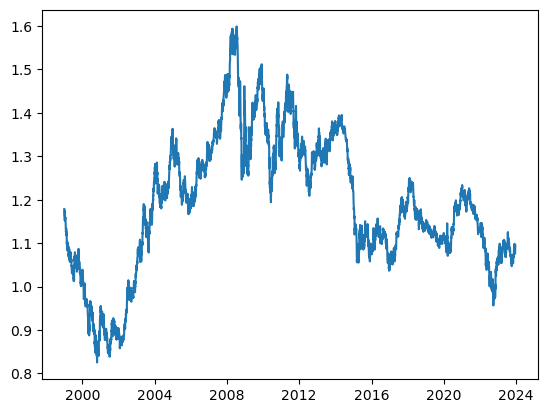

In [16]:
plt.plot(euro_to_usd['Time'],euro_to_usd['USD'])
plt.show()

If we look at the line’s shape, we see many small wiggles — rather than seeing a smooth line. The wiggles, however, have meaning: they are the visual representation of the daily variation in the exchange rate. The rate goes up and down; up and down again, day to day. The rate only shows clear upward or downward trends in the longer run (months or years).

Depending on our goals, we may not want to show that daily variation on our graph. If we want to hide it and show only the long-term trends, we can use the rolling mean (also known as the moving average).

##### Creating Moving Avg DATAFRAME

In [17]:
values = pd.DataFrame()
values['daily'] = pd.Series(range(1,20,2)) #Generating Numbers from 1 to 20 with gap of 2
values

,daily
0,1
1,3
2,5
3,7
4,9
5,11
6,13
7,15
8,17
9,19


In [18]:
values['rolling_2'] = values['daily'].rolling(2).mean()
values['rolling_3'] = values['daily'].rolling(3).mean()
values['rolling_4'] = values['daily'].rolling(4).mean()
values

,daily,rolling_2,rolling_3,rolling_4
0,1,NaN,NaN,NaN
1,3,2.0,NaN,NaN
2,5,4.0,3.0,NaN
3,7,6.0,5.0,4.0
4,9,8.0,7.0,6.0
5,11,10.0,9.0,8.0
6,13,12.0,11.0,10.0
7,15,14.0,13.0,12.0
8,17,16.0,15.0,14.0
9,19,18.0,17.0,16.0


In [19]:
euro_to_usd['Rolling_30'] = euro_to_usd['USD'].rolling(30).mean()
euro_to_usd['Rolling_90'] = euro_to_usd['USD'].rolling(90).mean()

#### Plotting Rolling Mean Graph of Different Intervals

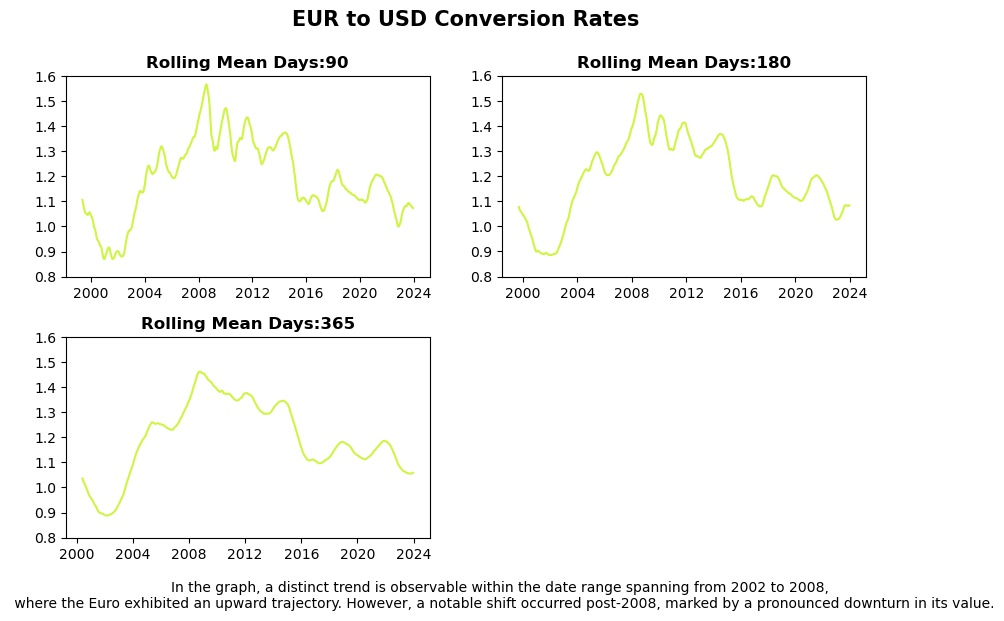

In [20]:
plt.figure(figsize=(10,6))
for i, rolling_mean in zip([1,2,3], [90,180,365]):
    plt.subplot(2,2,i)
    plt.plot(euro_to_usd['Time'],euro_to_usd['USD'].rolling(rolling_mean).mean(),color = '#cef542')
    plt.title('Rolling Mean Days:' + str(rolling_mean), weight = 'bold') 
    plt.yticks([i/10 for i in range(8, 17)])  
    plt.suptitle("EUR to USD Conversion Rates", fontweight='bold',fontsize=15)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.87, wspace=0.2, hspace=0.3)
plt.text(1.2, -0.35, 'In the graph, a distinct trend is observable within the date range spanning from 2002 to 2008, \n where the Euro exhibited an upward trajectory. However, a notable shift occurred post-2008, marked by a pronounced downturn in its value.',horizontalalignment='center', fontsize=10, transform=plt.gca().transAxes, color='black')
plt.show()


### Coming up with an IDEA
#### Here are a few story ideas for our data:
    • We show how the euro-dollar rate has changed during the coronavirus pandemic. We can show the 2020 data and the 2016-2019 data as a baseline. We can use a line plot.

    • We show how the euro-dollar rate changed during the 2007-2008 financial crisis. We can also show the data for 2006 and 2009 for comparison. We can use a line plot.
    
    • We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

#### Financial Crisis 2007 - 2008

In [21]:
euro_to_usd

,Time,USD,Rolling_30,Rolling_90
6455,1999-01-04,1.1789,NaN,NaN
6454,1999-01-05,1.1790,NaN,NaN
6453,1999-01-06,1.1743,NaN,NaN
6452,1999-01-07,1.1632,NaN,NaN
6451,1999-01-08,1.1659,NaN,NaN
...,...,...,...,...
4,2023-12-11,1.0757,1.080143,1.073608
3,2023-12-12,1.0804,1.080760,1.073452
2,2023-12-13,1.0787,1.081593,1.073251
1,2023-12-14,1.0919,1.082453,1.073140


In [22]:
f_crisis = euro_to_usd.copy()[(euro_to_usd['Time'].dt.year >= 2006) & (euro_to_usd['Time'].dt.year <= 2009)]
f_crisis_7_8 = euro_to_usd.copy()[(euro_to_usd['Time'].dt.year >= 2007) & (euro_to_usd['Time'].dt.year <= 2008)]

In [23]:
f_crisis

,Time,USD,Rolling_30,Rolling_90
4630,2006-01-02,1.1826,1.183087,1.198560
4629,2006-01-03,1.1875,1.183300,1.198100
4628,2006-01-04,1.2083,1.184573,1.197991
4627,2006-01-05,1.2088,1.185613,1.197869
4626,2006-01-06,1.2093,1.186647,1.197541
...,...,...,...,...
3592,2009-12-24,1.4398,1.477640,1.470653
3590,2009-12-28,1.4405,1.476097,1.470737
3589,2009-12-29,1.4433,1.474323,1.470859
3588,2009-12-30,1.4338,1.472533,1.470874


In [24]:
f_crisis_7_8

,Time,USD,Rolling_30,Rolling_90
4369,2007-01-02,1.3270,1.314257,1.284958
4368,2007-01-03,1.3231,1.315780,1.285479
4367,2007-01-04,1.3106,1.316663,1.285819
4366,2007-01-05,1.3084,1.317563,1.286126
4365,2007-01-08,1.3006,1.317963,1.286334
...,...,...,...,...
3854,2008-12-23,1.3978,1.303717,1.357024
3853,2008-12-24,1.4005,1.308633,1.356214
3850,2008-12-29,1.4270,1.314450,1.355610
3849,2008-12-30,1.4098,1.319193,1.354821


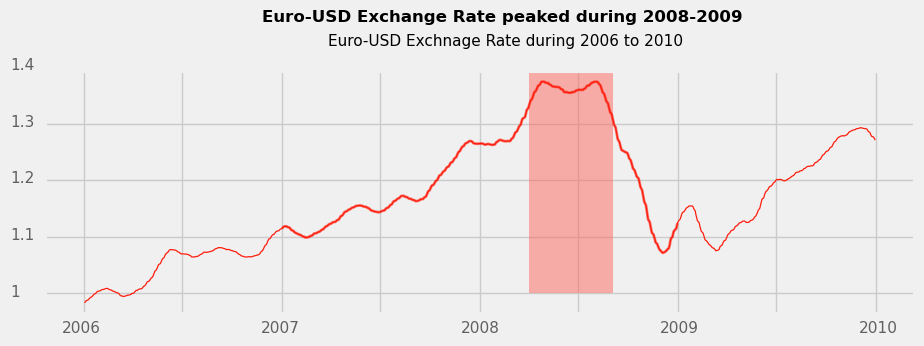

In [25]:
import matplotlib.style as style
style.use('fivethirtyeight')

fig,ax = plt.subplots(figsize=(10,3))
ax.plot(f_crisis['Time'],f_crisis['Rolling_30'], linewidth = 0.9 , color = '#ff1d0d')
ax.plot(f_crisis_7_8['Time'],f_crisis_7_8['Rolling_30'],linewidth = 2, color = '#ff1d0d',alpha=0.6)

ax.set_xticklabels([])

x=0.02
for year in ['2006','2007','2008','2009','2010',]:
    ax.text(x,-0.08, year, alpha =0.6, fontsize=11, transform=plt.gca().transAxes)
    x += 0.22888

ax.set_yticklabels([])
y=0.07
for rate in ['1','1.1','1.2','1.3','1.4']:
    ax.text(-0.04,y,rate,alpha =0.6, fontsize=11, transform=plt.gca().transAxes)
    y += 0.2333
    
ax.text(0.25,1.2, "Euro-USD Exchange Rate peaked during 2008-2009", weight='bold', size = 12,transform = plt.gca().transAxes )
ax.text(0.325,1.1, "Euro-USD Exchnage Rate during 2006 to 2010", size = 11, transform = plt.gca().transAxes)

ax.axvspan(xmin=pd.to_datetime("2008-04-1"), xmax=pd.to_datetime("2008-09-1"),ymin=0.09, color='#fc685d',alpha=0.5)
plt.show()

## Euro Performance during Covid19

In [26]:
covid_20 = euro_to_usd.loc[(euro_to_usd['Time'] >= '2020-01-01') & (euro_to_usd['Time'] <= '2020-12-31')]
covid = euro_to_usd.loc[(euro_to_usd['Time'] >= '2016-01-01') & (euro_to_usd['Time'] <= '2019-12-31')]

In [27]:
covid_20.head()

,Time,USD,Rolling_30,Rolling_90
1018,2020-01-02,1.1193,1.109237,1.105687
1017,2020-01-03,1.1147,1.109470,1.105734
1016,2020-01-06,1.1194,1.109920,1.105858
1015,2020-01-07,1.1172,1.110190,1.105969
1014,2020-01-08,1.1115,1.110380,1.106057


In [28]:
covid.head()

,Time,USD,Rolling_30,Rolling_90
2040,2016-01-04,1.0898,1.081743,1.102414
2039,2016-01-05,1.0746,1.081937,1.101834
2038,2016-01-06,1.0742,1.082307,1.101309
2037,2016-01-07,1.0868,1.083030,1.100900
2036,2016-01-08,1.0861,1.083947,1.100462


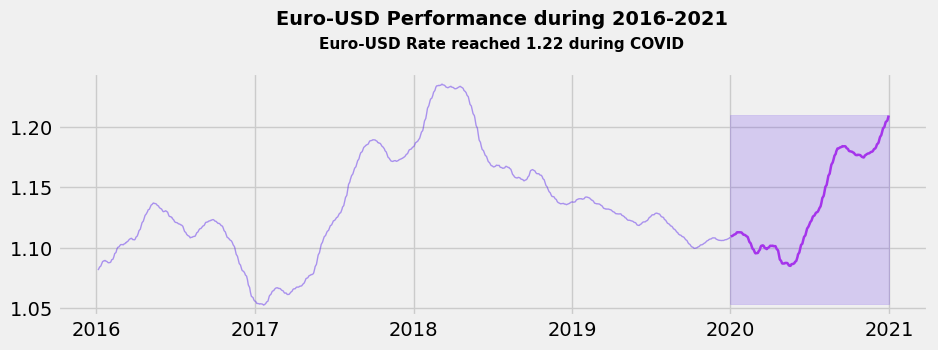

In [29]:
import matplotlib.style as style
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(10,3))
ax.plot(covid['Time'],covid['Rolling_30'],linewidth=1,color='#6434eb', alpha = 0.5)
ax.plot(covid_20['Time'],covid_20['Rolling_30'],linewidth=1.8,color='#a534eb')

ax.text(0.25,1.2, "Euro-USD Performance during 2016-2021", weight='bold',transform = plt.gca().transAxes)
ax.text(0.3,1.1, "Euro-USD Rate reached 1.22 during COVID", weight='bold',size = 11, transform = plt.gca().transAxes)

ax.axvspan(xmin=pd.to_datetime("2020-01-1"), xmax=pd.to_datetime("2020-12-31"),ymin=0.05,ymax=0.828, color='#6434eb',alpha=0.2)

plt.show()

### EURUSD Performnace during Three Presidencies

In [30]:
euro_to_usd.head()

,Time,USD,Rolling_30,Rolling_90
6455,1999-01-04,1.1789,NaN,NaN
6454,1999-01-05,1.1790,NaN,NaN
6453,1999-01-06,1.1743,NaN,NaN
6452,1999-01-07,1.1632,NaN,NaN
6451,1999-01-08,1.1659,NaN,NaN


In [32]:
df = euro_to_usd.copy()[(euro_to_usd['Time'].dt.year >= 2001) & (euro_to_usd['Time'].dt.year < 2021)]
bush = df.copy()[df['Time'].dt.year < 2009]
obama = df.copy()[(df['Time'].dt.year >= 2009) & (df['Time'].dt.year < 2017)]
trump = df.copy()[(df['Time'].dt.year >= 2017) & (df['Time'].dt.year < 2021)]


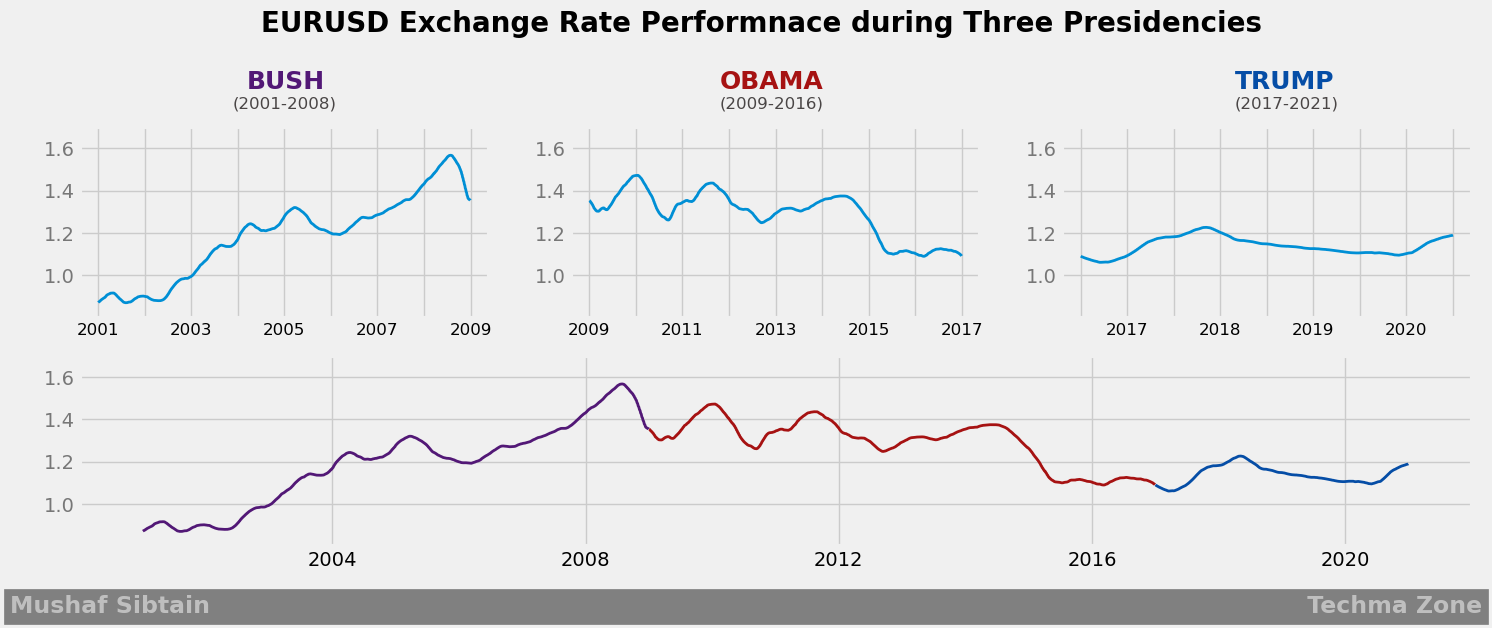

In [34]:
style.use('fivethirtyeight')

plt.figure(figsize=(16,8))

# for subplots
ax1 = plt.subplot(3,3,1)
ax2 = plt.subplot(3,3,2)
ax3 = plt.subplot(3,3,3)

#for large plot
ax4 = plt.subplot(3,1,2)


axes = [ax1,ax2,ax3,ax4]
for ax in axes:
    ax.set_ylim(0.8,1.7)
    ax.set_yticks([1.0,1.2,1.4,1.6])
    ax.set_yticklabels(['1.0','1.2','1.4','1.6'],alpha=0.5)

#Bush
ax1.plot(bush['Time'],bush['Rolling_90'],linewidth=2)
ax1.set_xticklabels(['','2001','','2003','','2005','','2007','','2009'],fontsize=12)
ax1.text(0.12,2.4,'BUSH',fontsize=18,weight = 'bold' ,color='#521876',transform=plt.gca().transAxes)
ax1.text(0.11,2.3,'(2001-2008)',fontsize=12,color='#4a4646',transform=plt.gca().transAxes)

#Obama
ax2.plot(obama['Time'],obama['Rolling_90'],linewidth=2)
ax2.set_xticklabels(['','2009','','2011','','2013','','2015','','2017'],fontsize=12)
ax2.text(0.46,2.4,'OBAMA',fontsize=18,weight = 'bold' ,color='#A61212',transform=plt.gca().transAxes)
ax2.text(0.46,2.3,'(2009-2016)',fontsize=12,color='#4a4646',transform=plt.gca().transAxes)

#Trump
ax3.plot(trump['Time'],trump['Rolling_90'],linewidth=2)
ax3.set_xticklabels(['','2017','','2018','','2019','','2020','','2021'],fontsize=12)
ax3.text(0.83,2.4,'TRUMP',fontsize=18,weight = 'bold' , color='#054da6',transform=plt.gca().transAxes)
ax3.text(0.83,2.3,'(2017-2021)',fontsize=12,color='#4a4646',transform=plt.gca().transAxes)

#merging
ax4.plot(bush['Time'],bush['Rolling_90'],color='#521876',linewidth=2)
ax4.plot(obama['Time'],obama['Rolling_90'],color='#A61212',linewidth=2)
ax4.plot(trump['Time'],trump['Rolling_90'],color='#054da6',linewidth=2)

ax1.text(0.13, 2.7, 'EURUSD Exchange Rate Performnace during Three Presidencies', fontsize=20, weight='bold', transform=plt.gca().transAxes)
ax4.text(-0.05, -0.35,'Mushaf Sibtain' + ' '*133 + 'Techma Zone', size=17,weight='bold',color='white',backgroundcolor='grey',alpha=0.5, transform=plt.gca().transAxes)
#ax.axvspan(xmin=pd.to_datetime("2008-6-1"), xmax=pd.to_datetime("2008-10-1"),ymin=0.09, color='#fc685d',alpha=0.5)
plt.show()